### What is the most optimal skill to learn for Data Analysts?
Methodology
1. Continue from last notebook to find percent of postings with skill
2. Visualize median salary vs percent skill demand
3. (Optional) Determine if certain technologies are more prevalent

In [198]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt  
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [199]:
# Filter for DA and country US
df_DA_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()

# Drop NaN values from salary
df_DA_US = df_DA_US.dropna(subset="salary_year_avg")

# Explode job skills
df_DA_US_exploded = df_DA_US.explode("job_skills")

# Display first 5 entries only
df_DA_US_exploded[["salary_year_avg", "job_skills"]].head()

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [200]:
# Group data by skills, get count and median salary
df_DA_skills = df_DA_US_exploded.groupby("job_skills")["salary_year_avg"].agg(["count", "median"]).sort_values(by="count", ascending=False)

# Option 2
# df_DA_skills = df_DA_US_exploded.groupby("job_skills").agg(skill_count = ("job_skills", "count"), median_salary=("salary_year_avg", "median"))
# Sort by count (if the above Option 2 is used)
# df_DA_skills = df_DA_skills.sort_values(by="skill_count", ascending=False)

# Rename columns
df_DA_skills = df_DA_skills.rename(columns={"count": "skill_count", "median": "median_salary"})

# Find count of Data Analyst jobs in US with salary info
DA_job_count = len(df_DA_US)

# Calculate the percentage of each skill out of total DA jobs
df_DA_skills["skill_percent"] = (df_DA_skills["skill_count"] / DA_job_count * 100)

# Filter out skills with no associated jobs
df_DA_skills = df_DA_skills[df_DA_skills["skill_percent"] > 0]

df_DA_skills


,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
theano,1,100000.0,0.022989
typescript,1,65000.0,0.022989
vmware,1,147500.0,0.022989


In [201]:
skill_limit = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills["skill_percent"] > skill_limit]
df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


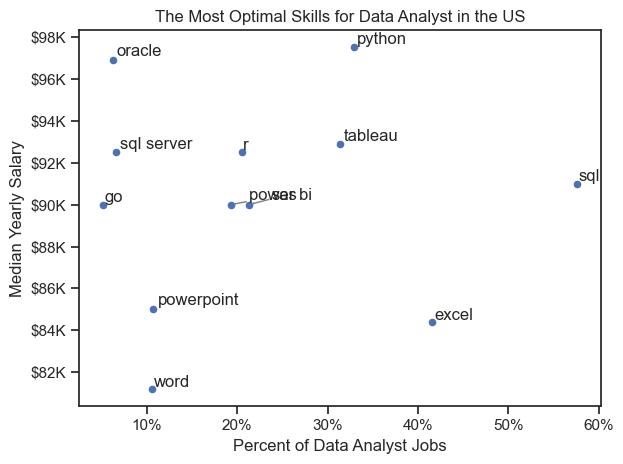

In [202]:
from adjustText import adjust_text

df_DA_skills_high_demand.plot(kind="scatter", x="skill_percent", y="median_salary")

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand["skill_percent"].iloc[i], df_DA_skills_high_demand["median_salary"].iloc[i], txt))

from matplotlib.ticker import PercentFormatter
ax = plt.gca() # gca=get current access
# format Y-axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K"))

# format X-axis
ax.xaxis.set_major_formatter(PercentFormatter())

# add adjustText to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=1))

plt.xlabel("Percent of Data Analyst Jobs")
plt.ylabel("Median Yearly Salary")
plt.title("The Most Optimal Skills for Data Analyst in the US")
plt.tight_layout()
plt.show()

In [203]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row) # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict: # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                      # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['datarobot',
  'powerbi',
  'dax',
  'esquisse',
  'looker',
  'ssis',
  'spss',
  'sas',
  'excel',
  'sharepoint',
  'tableau',
  'ms access',
  'powerpoint',
  'microstrategy',
  'splunk',
  'visio',
  'nuix',
  'alteryx',
  'sap',
  'ssrs',
  'sheets',
  'cognos',
  'msaccess',
  'word',
  'power bi',
  'spreadsheet',
  'qlik',
  'outlook'],
 'programming': ['python',
  'crystal',
  'solidity',
  'html',
  'java',
  'julia',
  'shell',
  'bash',
  'ruby',
  't-sql',
  'c',
  'sas',
  'groovy',
  'fortran',
  'nosql',
  'perl',
  'no-sql',
  'c#',
  'rust',
  'matlab',
  'typescript',
  'sass',
  'vba',
  'f#',
  'delphi',
  'apl',
  'pascal',
  'sql',
  'lisp',
  'haskell',
  'golang',
  'lua',
  'assembly',
  'powershell',
  'go',
  'cobol',
  'r',
  'swift',
  'dart',
  'vb.net',
  'visualbasic',
  'php',
  'javascript',
  'kotlin',
  'objective-c',
  'ocaml',
  'erlang',
  'css',
  'mongo',
  'c++',
  'visual basic',
  'clojure',
  'mongodb',
  'scala',
  'eli

In [204]:
# turn dictionary into dataframe
df_technology = pd.DataFrame(list(technology_dict.items()), columns=["technology", "skills"])

# Explode skills
df_technology = df_technology.explode("skills")
df_technology.head()

,technology,skills
0,analyst_tools,datarobot
0,analyst_tools,powerbi
0,analyst_tools,dax
0,analyst_tools,esquisse
0,analyst_tools,looker


In [205]:
# merge df_DA_skills and df_technology
df_DA_skills_tech = df_DA_skills.merge(df_technology, left_on="job_skills", right_on="skills")

df_DA_skills_tech

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.0,57.655172,programming,sql
1,1808,84392.0,41.563218,analyst_tools,excel
2,1431,97500.0,32.896552,programming,python
3,1364,92875.0,31.356322,analyst_tools,tableau
4,926,90000.0,21.287356,analyst_tools,sas
...,...,...,...,...,...
169,1,100000.0,0.022989,libraries,theano
170,1,65000.0,0.022989,programming,typescript
171,1,147500.0,0.022989,cloud,vmware
172,1,65000.0,0.022989,webframeworks,vue


In [206]:
df_DA_skills_tech_high_demand = df_DA_skills_tech[df_DA_skills_tech["skill_percent"] > skill_limit]

df_DA_skills_tech_high_demand

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word


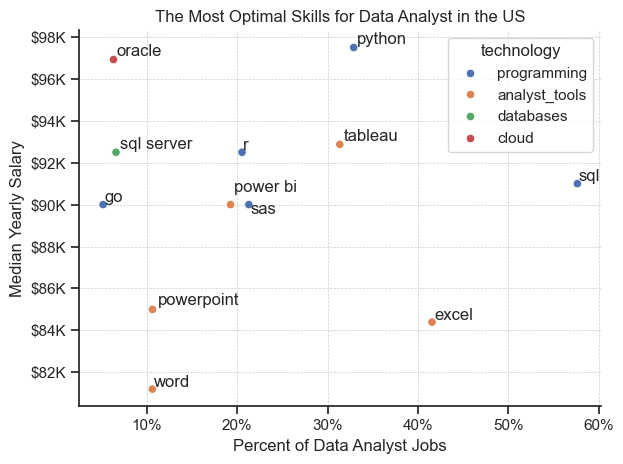

In [207]:
from adjustText import adjust_text

# df_DA_skills_tech_high_demand.plot(kind="scatter", x="skill_percent", y="median_salary")
sns.scatterplot(
    data=df_DA_skills_tech_high_demand,
    x="skill_percent",
    y="median_salary",
    hue="technology",
    )
sns.set_theme(style="ticks")
sns.despine()

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    x = df_DA_skills_high_demand["skill_percent"].iloc[i]
    y = df_DA_skills_high_demand["median_salary"].iloc[i]
    
    if txt in ["power bi"]:
        texts.append(plt.text(x, y +500, txt)) # move label up
    else:
        texts.append(plt.text(x, y, txt))

from matplotlib.ticker import PercentFormatter
ax = plt.gca() # gca=get current access
# format Y-axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K"))

# format X-axis
ax.xaxis.set_major_formatter(PercentFormatter())

# add adjustText to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=1))

plt.xlabel("Percent of Data Analyst Jobs")
plt.ylabel("Median Yearly Salary")
plt.title("The Most Optimal Skills for Data Analyst in the US")
plt.tight_layout()
plt.grid(True, linestyle="--", linewidth=0.5)
# plt.legend(frameon=False) # to hide frame around legends
plt.show()